In [1]:
import pandas as pd
import numpy as np
import os

path = r'C:\Users\alber\Instacart Basket Analysis'

In [2]:
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged.pkl'))

In [3]:
df_ords_prods_merged.shape

(32404859, 15)

In [4]:
# Creating smaller subset of original dataframe

df = df_ords_prods_merged[:1000000]

In [5]:
# Defining price ranges to sort data

def price_label(row):
    if row['prices'] <= 5:
        return 'Low-range product'
    if (row['prices'] > 5) & (row['prices'] <= 15):
        return 'Mid-range product'
    elif row['prices'] > 15:
        return 'High range'
    else: return 'Not enough data'

In [6]:
# Sorting data using created function

df['price_range'] = df.apply(price_label, axis=1)

C:\Users\alber\AppData\Local\Temp\ipykernel_21972\3970212733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [7]:
df['price_range'].value_counts(dropna = False)

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [8]:
df['prices'].max()

14.8

### Sorting using loc() function

In [9]:
df.loc[df['prices']>15, 'price_range_loc'] = 'High range product'

C:\Users\alber\AppData\Local\Temp\ipykernel_21972\261024595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices']>15, 'price_range_loc'] = 'High range product'


In [10]:
df.loc[(df['prices']<=15) & (df['prices']>5), 'price_range_loc'] = 'Mid range product'

In [11]:
df.loc[df['prices']<=5, 'price_range_loc'] = 'Low range product'

In [12]:
df['price_range_loc'].value_counts(dropna = False)

Mid range product    756450
Low range product    243550
Name: price_range_loc, dtype: int64

### Sorting entire dataframe using loc()  

In [13]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices']>15, 'price_range_loc'] = 'High-range product'

In [14]:
df_ords_prods_merged.loc[(df_ords_prods_merged['prices']<=15) & (df_ords_prods_merged['prices']>5), 'price_range_loc'] = 'Mid range product'

In [15]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices']<=5, 'price_range_loc'] = 'Low range product'

In [16]:
# Counting price ranges in entire data frame
df_ords_prods_merged['price_range_loc'].value_counts(dropna = False)

Mid range product     21860860
Low range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

In [17]:
# Busiest days for ordering

df_ords_prods_merged['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [18]:
result = []

for value in df_ords_prods_merged["orders_day_of_week"]:
    if value == 0: 
        result.append("Busiest day")
    elif value == 4:
        result.append("Least busy")
    else:
        result.append("Regularly busy")

In [19]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Reg

In [20]:
df_ords_prods_merged['busiest_day'] = result

In [21]:
df_ords_prods_merged['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

# Task

In [22]:
result2 = []

for value in df_ords_prods_merged["orders_day_of_week"]:
    if value in [0,1]: 
        result2.append("Busiest days")
    elif value in [3,4]:
        result2.append("Slowest days")
    else:
        result2.append("Regularly busy")

In [23]:
df_ords_prods_merged['busiest_days'] = result2

In [24]:
df_ords_prods_merged['busiest_days'].value_counts()

Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: busiest_days, dtype: int64

In [25]:
df_ords_prods_merged['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [26]:
6204182 + 5660230

11864412

In [27]:
3840534 + 3783802

7624336

In [28]:
df_ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid range product,Regularly busy,Regularly busy
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days


In [29]:
# Identify busiest hours of day

df_time = df_ords_prods_merged['order_hour_of_day'].value_counts()
df_time

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

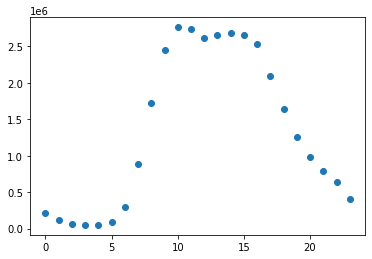

In [30]:
time = list(df_time.index)
frequency = list(df_time)
import matplotlib.pyplot as plt
plt.plot(time,frequency, 'o')

#### According to plot of order frequency for hour of day, 0-6 is 'Fewest orders', 9-16 is 'Most orders', and the rest is 'Average Orders'

In [31]:
# Defining "busiest_period_of_day"

result3 = []

for value in df_ords_prods_merged['order_hour_of_day']:
    if value >=9 and value <=16:
        result3.append("Most orders")
    elif value<=6:
        result3.append("Fewest orders")
    else: 
        result3.append("Average orders")

In [32]:
df_ords_prods_merged['busiest_period_of_day'] = result3
df_ords_prods_merged['busiest_period_of_day'].value_counts()

Most orders       21118071
Average orders    10399967
Fewest orders       886821
Name: busiest_period_of_day, dtype: int64

In [33]:
df_ords_prods_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_new.pkl'))